# **CLASSIFICATION LOGISTIC REGRESSION**

## preprocessing

### umport librairies et chargement du dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('attaque_cardiaque.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### vérification des doublons

In [3]:
duplicate = df.duplicated().value_counts()
duplicate

True     3680
False    1320
Name: count, dtype: int64

### suppression des doublons

In [4]:
df = df.drop_duplicates()

<i>
        <h3> fonction analyse si:</h3>
            -valeur manquante pour pouvoir les remplacer et verifier si la colonne est utile<br>
            -le nombre de valeur null pour les colonnes de type int et float pour verifier si la colonne est utile<br>
            -type de chaque colonne pour prévoir un possible encodage en cas de type string<br>
            -le nombre de valeur unique pour voir si un colonne est utile ou pas <>
    </i>

In [5]:
def analyse(df):
    resultat = []
    for col in df.columns:
        val_manquante = df[col].isnull().sum()
        zero = (df[col] == 0).sum() if df[col].dtype == 'int64' or df[col].dtype == 'float64' else 'object'
        types = df[col].dtypes
        uniques = df[col].nunique()
        resultat.append((col, val_manquante, zero, types, uniques))
        
    resume = pd.DataFrame(resultat, columns=['colonne','val_manquante', 'zero', 'types', 'uniques'])
    return resume

In [6]:
analyse(df)

,colonne,val_manquante,zero,types,uniques
0,age,0,0,float64,48
1,anaemia,0,679,int64,2
2,creatinine_phosphokinase,0,0,int64,290
3,diabetes,0,730,int64,2
4,ejection_fraction,0,0,int64,17
5,high_blood_pressure,0,832,int64,2
6,platelets,0,0,float64,203
7,serum_creatinine,0,0,float64,43
8,serum_sodium,0,0,int64,27
9,sex,0,468,int64,2


#### nous avons pas de valeurs manquantes et les données sont bonnes et nous avons aucunes valeurs à encoder

******************************************************************************************************

### Boxplot pour vour si nous avons des valeurs abérantes

C:\Users\lf\AppData\Local\Temp\ipykernel_19312\88771976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age",data=df,ax=axes[0, 0], palette="pastel")
C:\Users\lf\AppData\Local\Temp\ipykernel_19312\88771976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="anaemia",data=df,ax=axes[0, 1], palette="muted")
C:\Users\lf\AppData\Local\Temp\ipykernel_19312\88771976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="creatinine_phosphokinase",data=df, ax=axes[0, 2],palette="Set2")
C:\Users\lf\AppData\Local\Temp\ipykernel_19312\8877197

<Axes: xlabel='serum_sodium'>

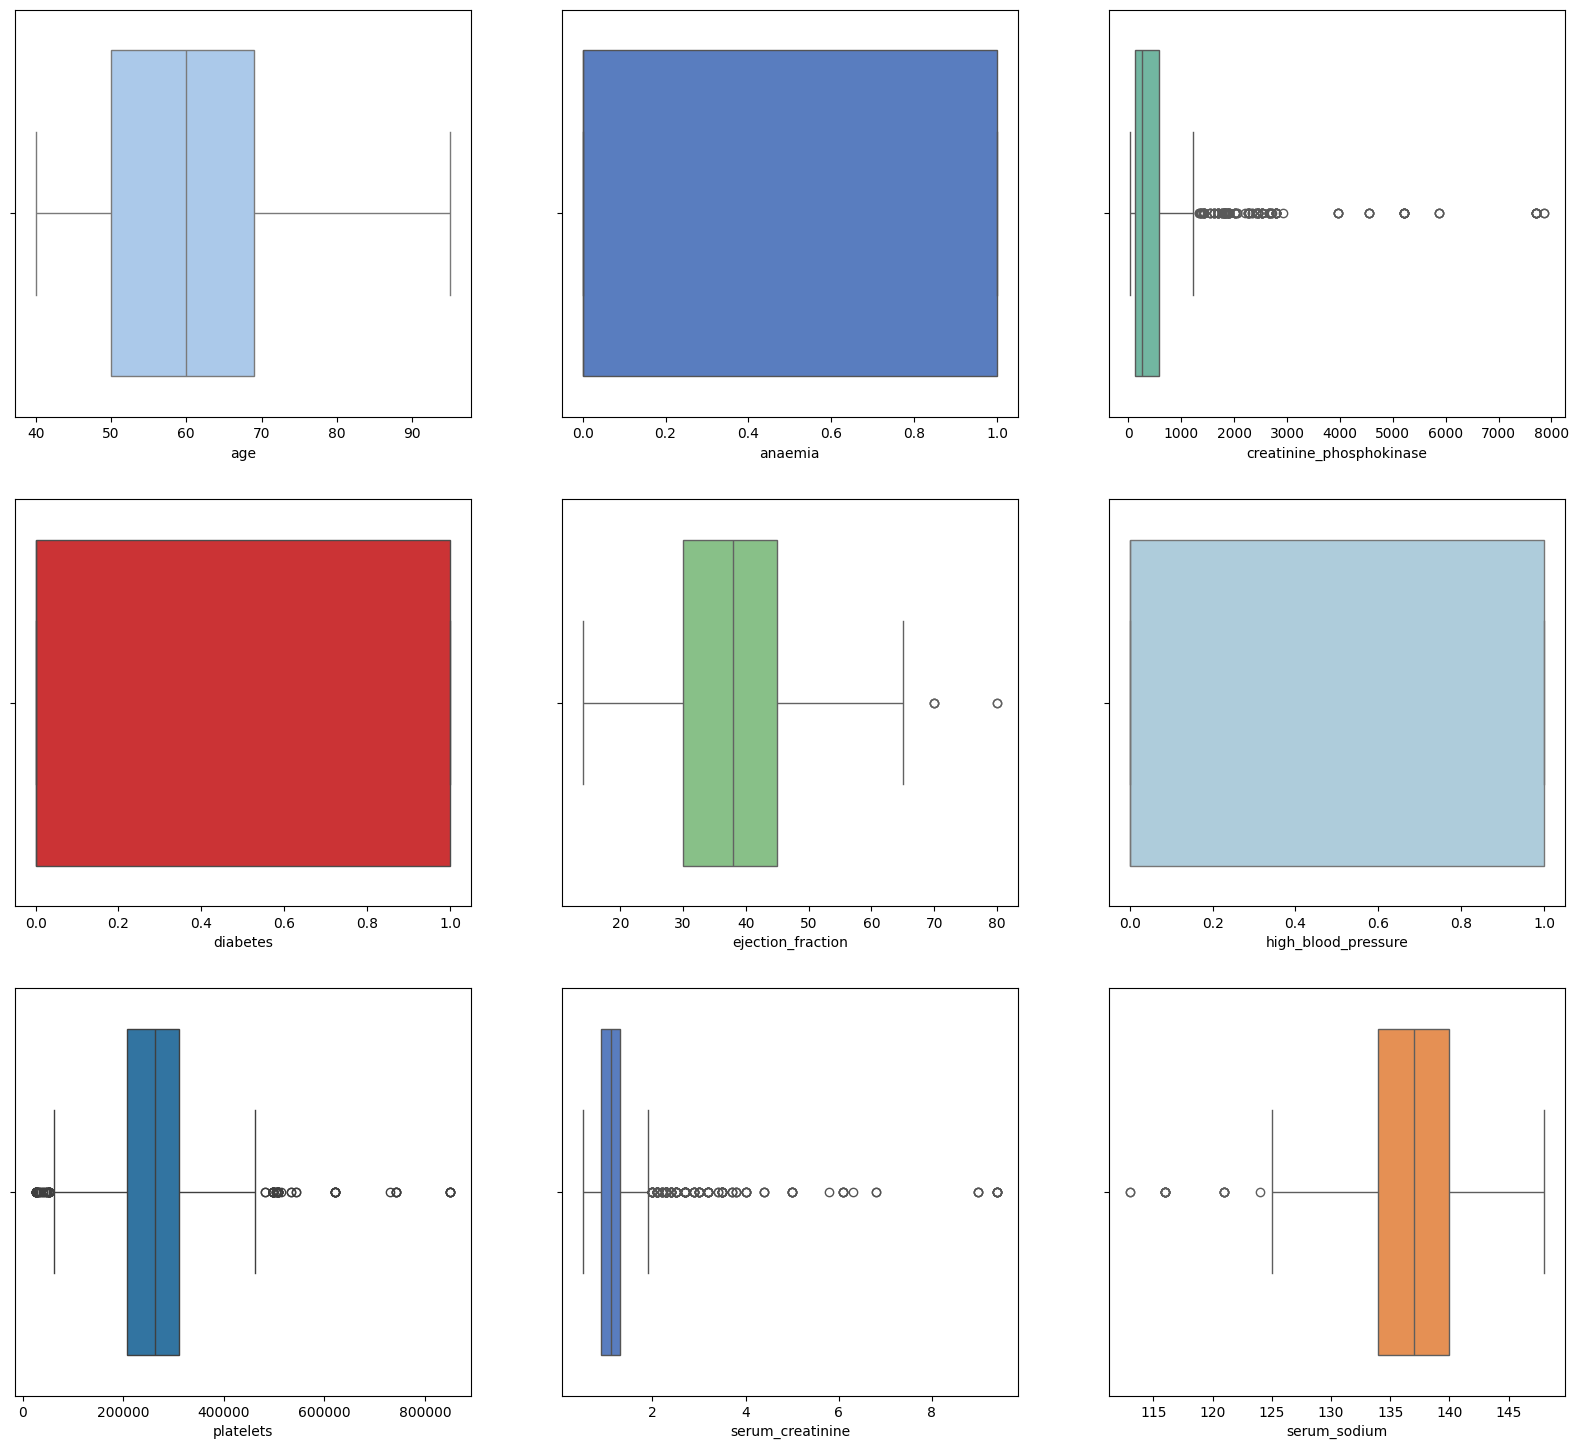

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
sns.boxplot(x="age",data=df,ax=axes[0, 0], palette="pastel")
sns.boxplot(x="anaemia",data=df,ax=axes[0, 1], palette="muted")
sns.boxplot(x="creatinine_phosphokinase",data=df, ax=axes[0, 2],palette="Set2")
sns.boxplot(x="diabetes",data=df,ax=axes[1, 0],palette="Set1")
sns.boxplot(x="ejection_fraction",data=df,ax=axes[1, 1],palette="Accent")
sns.boxplot(x="high_blood_pressure",data=df,ax=axes[1, 2],palette="Paired")
sns.boxplot(x="platelets",data=df,ax=axes[2, 0],palette="tab10")
sns.boxplot(x="serum_creatinine",data=df,ax=axes[2, 1],palette="muted")
sns.boxplot(x="serum_sodium",data=df,ax=axes[2, 2],palette="Oranges")


C:\Users\lf\AppData\Local\Temp\ipykernel_19312\1242796468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex",data=df,ax=axes[0],palette="Dark2")
C:\Users\lf\AppData\Local\Temp\ipykernel_19312\1242796468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="smoking",data=df,ax=axes[1],palette="YlOrBr")
C:\Users\lf\AppData\Local\Temp\ipykernel_19312\1242796468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="time",data=df,ax=axes[2],palette="Greys")


<Axes: xlabel='time'>

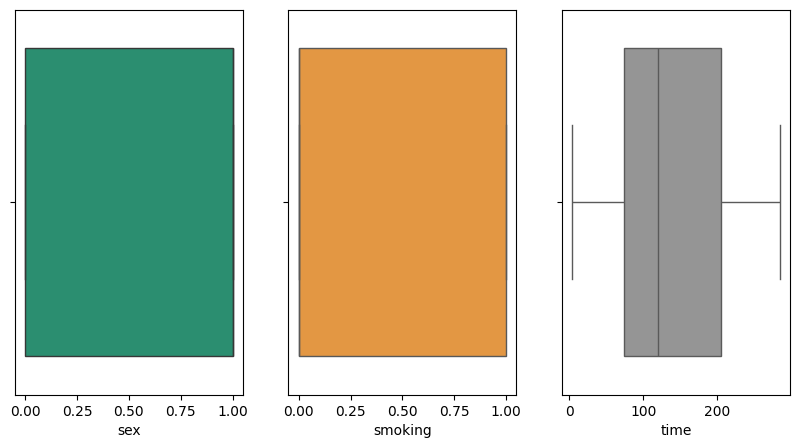

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
sns.boxplot(x="sex",data=df,ax=axes[0],palette="Dark2")
sns.boxplot(x="smoking",data=df,ax=axes[1],palette="YlOrBr")
sns.boxplot(x="time",data=df,ax=axes[2],palette="Greys")

###

### traitement des valeurs abérantes

In [9]:
def replace_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [10]:
replace_outliers(df)

C:\Users\lf\AppData\Local\Temp\ipykernel_19312\2475654548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
C:\Users\lf\AppData\Local\Temp\ipykernel_19312\2475654548.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
C:\Users\lf\AppData\Local\Temp\ipykernel_19312\2475654548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

C:\Users\lf\AppData\Local\Temp\ipykernel_19312\604751131.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="serum_creatinine",data=df,palette="muted")


<Axes: xlabel='serum_creatinine'>

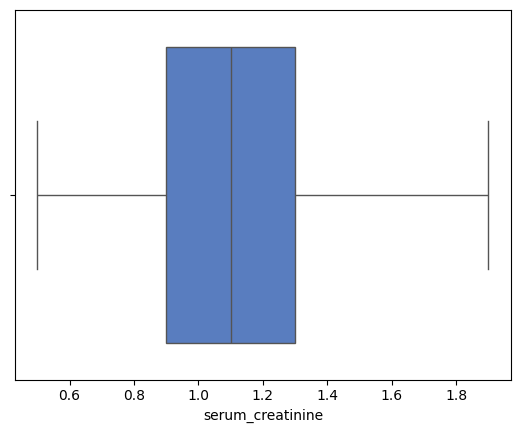

In [11]:
sns.boxplot(x="serum_creatinine",data=df,palette="muted")

### Matrice de correlation

<Axes: >

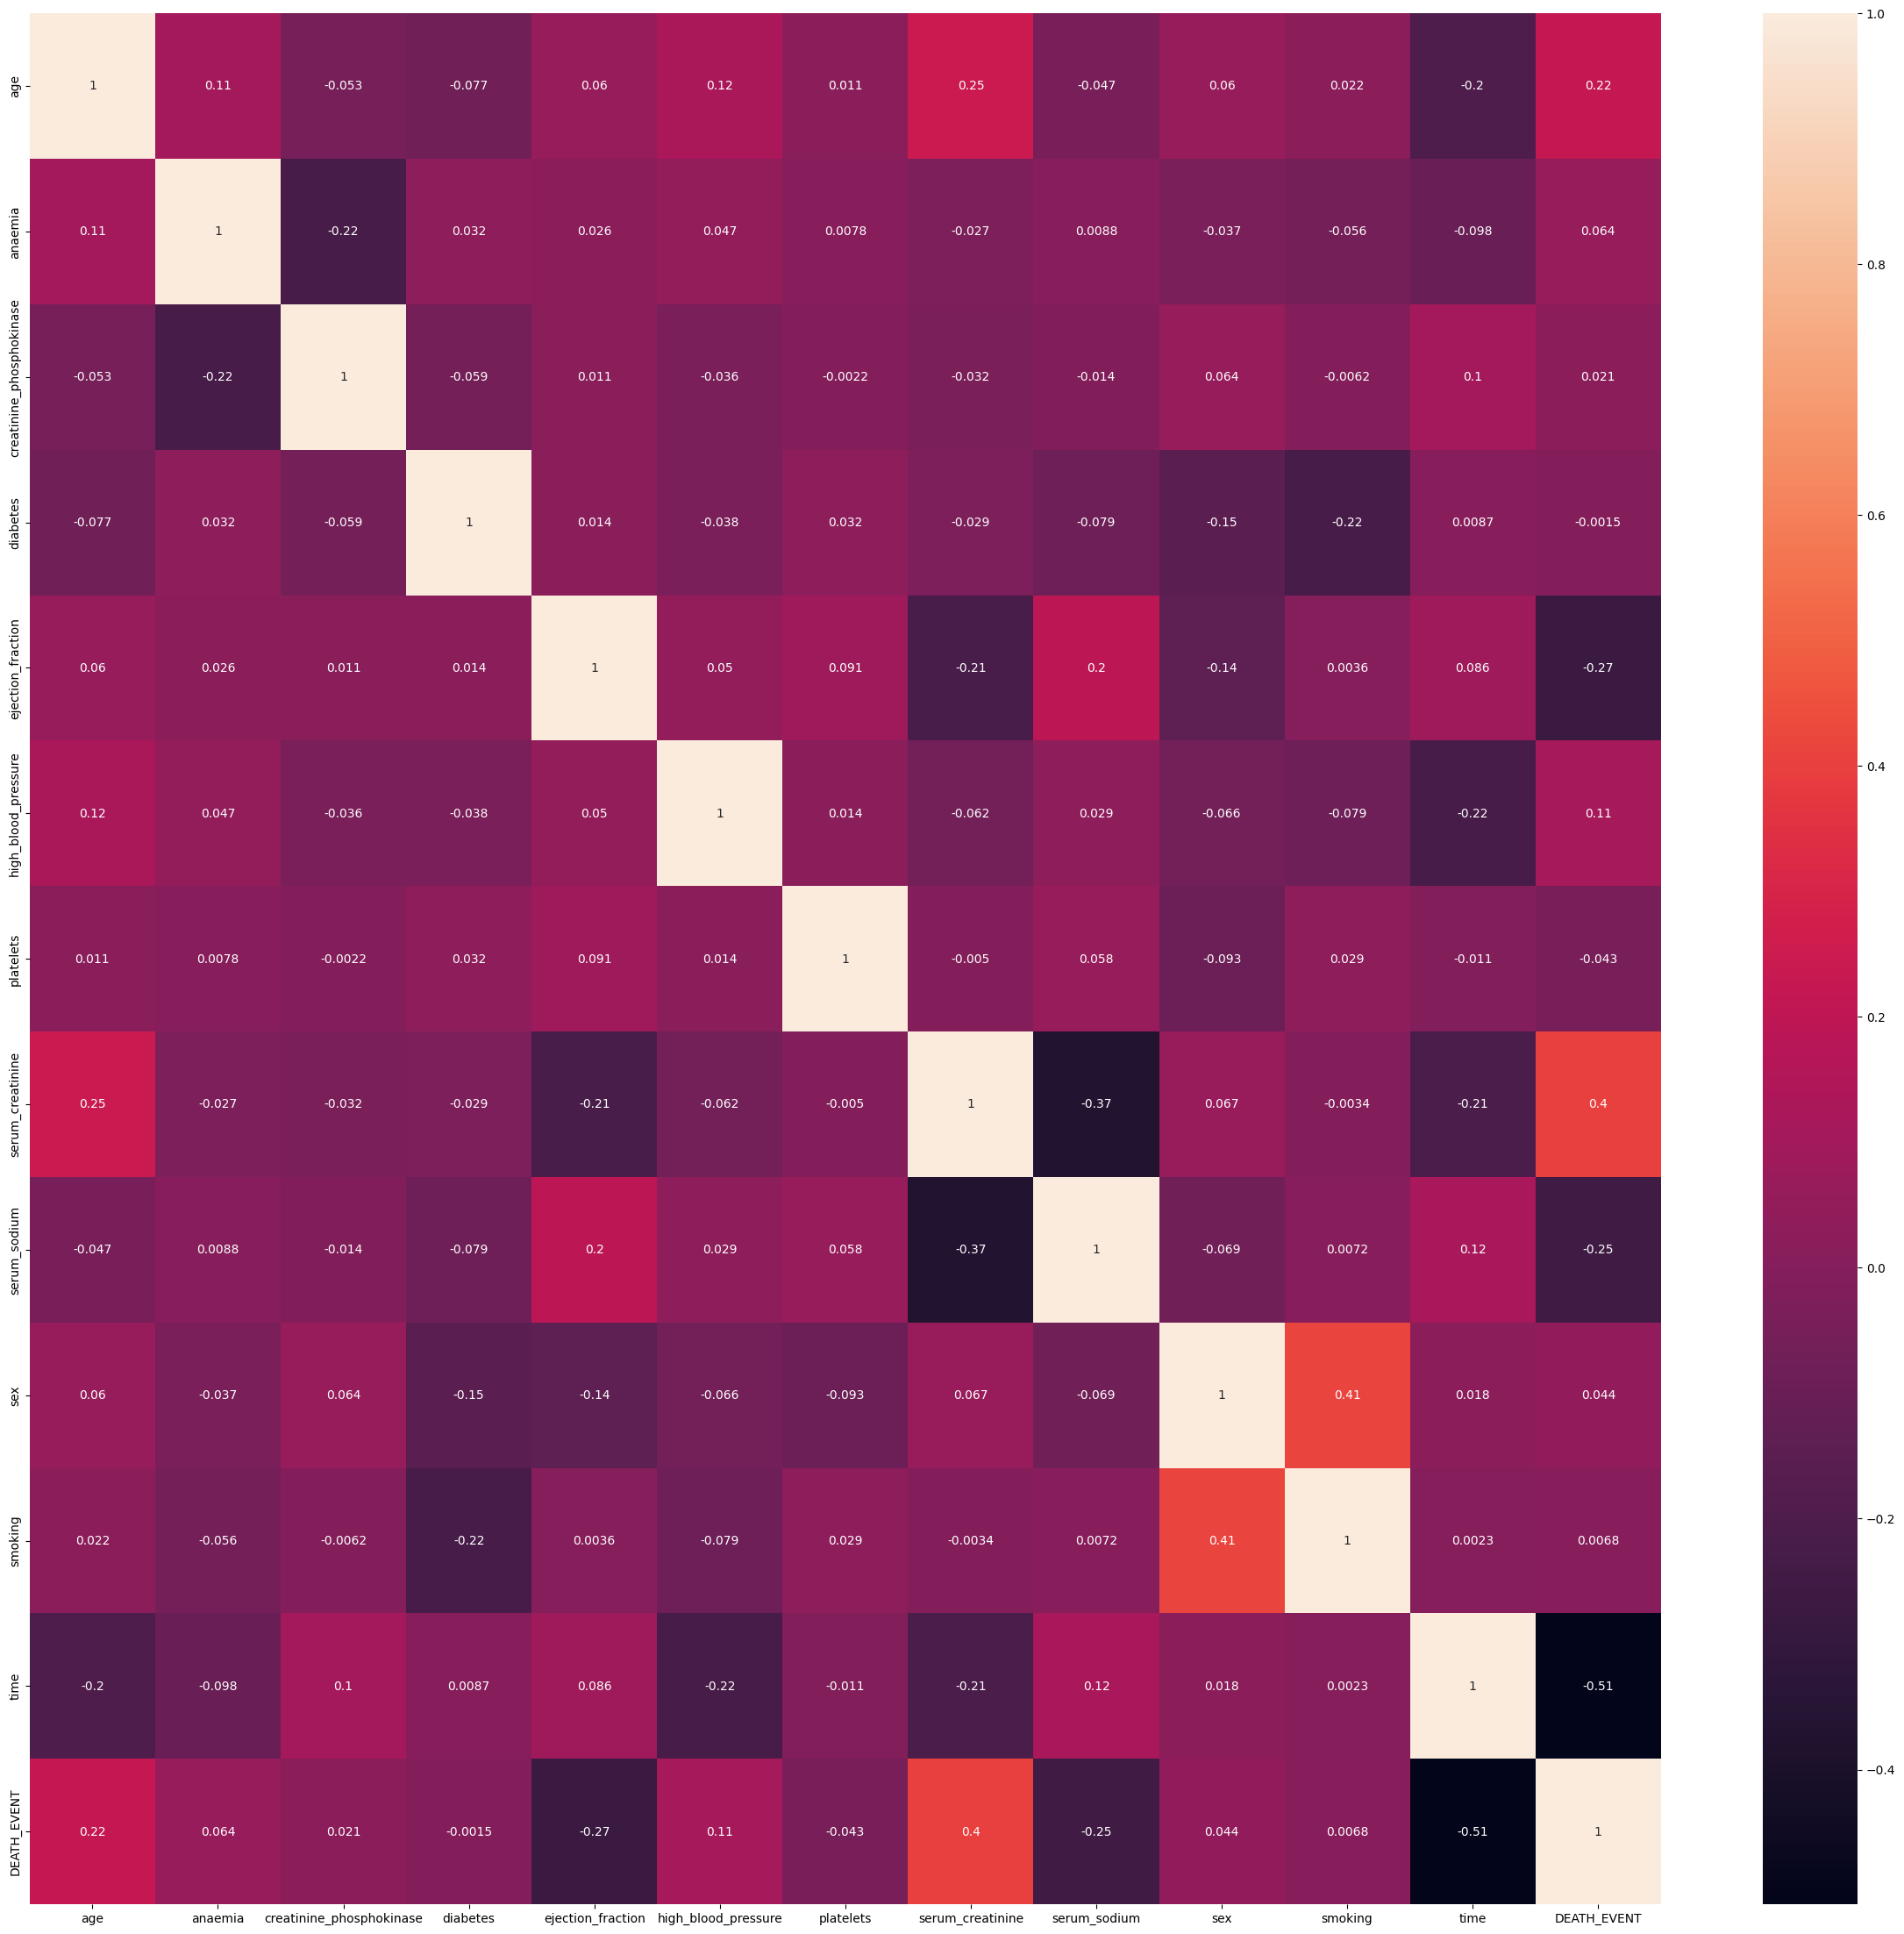

In [12]:
plt.figure(figsize=(30, 28)) 
sns.heatmap(df.corr(),annot=True) 

## Fin preprocessing

## Classification

### X et y

In [13]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

### Split de X et y

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 743   50.0      1.0                     111.0       1.0               40.0   
 1221  75.0      0.0                     319.0       0.0               38.0   
 234   70.0      0.0                      75.0       0.0               30.0   
 668   45.0      0.0                    1282.5       1.0               38.0   
 153   52.0      1.0                      58.0       1.0               35.0   
 ...    ...      ...                       ...       ...                ...   
 1439  45.0      0.0                     582.0       1.0               38.0   
 1512  65.0      1.0                      68.0       1.0               60.0   
 3559  60.0      0.0                      80.0       0.0               35.0   
 1117  70.0      1.0                     125.0       1.0               45.0   
 1505  46.0      0.0                     168.0       1.0               17.0   
 
       high_blood_pressure  platelets  serum_creat

### Standardisation

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
X_train_scaler, X_test_scaler

(array([[-0.89649864,  1.03077641, -0.79832399, ...,  0.73135745,
         -0.66678066,  0.5585218 ],
        [ 1.19267547, -0.9701425 , -0.25631146, ...,  0.73135745,
         -0.66678066,  0.39050262],
        [ 0.77484065, -0.9701425 , -0.89213385, ...,  0.73135745,
         -0.66678066,  1.01088114],
        ...,
        [-0.06082899, -0.9701425 , -0.8791047 , ...,  0.73135745,
         -0.66678066,  1.63125965],
        [ 0.77484065,  1.03077641, -0.76184237, ...,  0.73135745,
          1.49974357, -0.85025441],
        [-1.23076649, -0.9701425 , -0.64979171, ..., -1.36732045,
         -0.66678066, -0.41081963]]),
 array([[-0.06082899,  1.03077641,  0.49416743, ..., -1.36732045,
         -0.66678066, -1.00534904],
        [-0.22796292,  1.03077641, -0.30582222, ..., -1.36732045,
         -0.66678066, -0.5271406 ],
        [-0.47866382, -0.9701425 , -0.91558631, ...,  0.73135745,
          1.49974357,  1.30814584],
        ...,
        [-1.56503435, -0.9701425 , -0.82177645, ..., -

### Module de classification

In [16]:
from sklearn.svm import SVC
regressor = SVC(kernel = 'rbf', random_state = 0)
regressor.fit(X_train_scaler, y_train)

SVC(random_state=0)

### Matrice de confusion

Matrice de confusion (Train)


<Axes: >

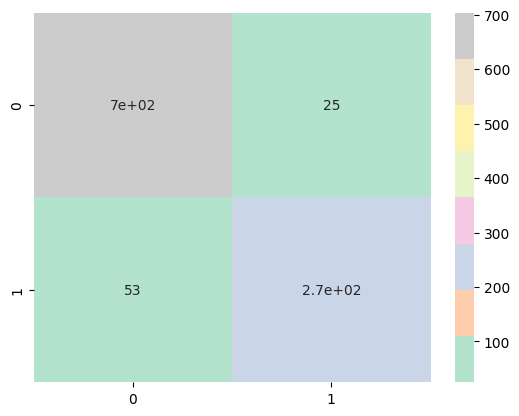

In [17]:
#Prediction du model avec train
y_predict_train = regressor.predict(X_train_scaler)
#evaluation du model
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
mse_train = confusion_matrix(y_train, y_predict_train)
print('Matrice de confusion (Train)')
sns.heatmap(mse_train, annot=True, cmap='Pastel2')

### Rapport de classification

In [18]:
#plt.xlabel('Prédictions')
print('Classification report (Train)')
print(classification_report(y_train, y_predict_train))
print('Accuracy score (Train):', accuracy_score(y_train, y_predict_train))

Classification report (Train)
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       729
         1.0       0.92      0.84      0.88       327

    accuracy                           0.93      1056
   macro avg       0.92      0.90      0.91      1056
weighted avg       0.93      0.93      0.93      1056

Accuracy score (Train): 0.9261363636363636


### courbe

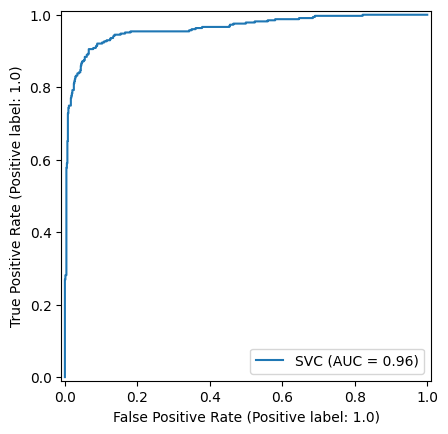

In [19]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(regressor,X_train_scaler,y_train)

### prediction

In [20]:
regressor.predict([[20,0,400,1,13,1,201786.0,0.8,99,1,0,50]])

array([1.])

## Fin classification

## Optimisation

In [31]:
#grid search
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1],
    }
Gs_cv = GridSearchCV(estimator=regressor, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
Gs_cv.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy')

In [33]:
Gs_cv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [34]:
from sklearn.svm import SVC
regressorx = SVC(C= 10, gamma= 0.1,kernel= 'rbf', random_state = 0)
regressorx.fit(X_train_scaler, y_train)

SVC(C=10, gamma=0.1, random_state=0)

Matrice de confusion (Train)


<Axes: >

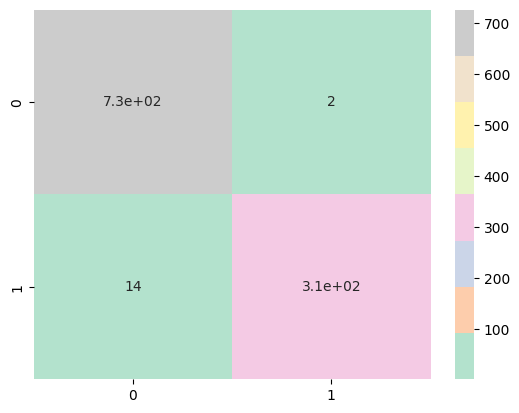

In [35]:
#Prediction du model avec train
y_predict_traine = regressorx.predict(X_train_scaler)
#evaluation du model
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
mse_train = confusion_matrix(y_train, y_predict_traine)
print('Matrice de confusion (Train)')
sns.heatmap(mse_train, annot=True, cmap='Pastel2')

In [36]:
#plt.xlabel('Prédictions')
print('Classification report (Train)')
print(classification_report(y_train, y_predict_traine))
print('Accuracy score (Train):', accuracy_score(y_train, y_predict_train))

Classification report (Train)
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       729
         1.0       0.99      0.96      0.98       327

    accuracy                           0.98      1056
   macro avg       0.99      0.98      0.98      1056
weighted avg       0.98      0.98      0.98      1056

Accuracy score (Train): 0.9261363636363636


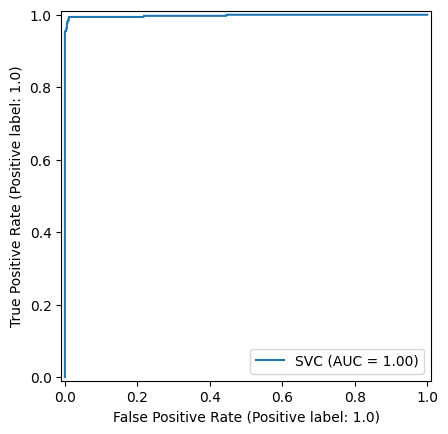

In [37]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(regressorx,X_train_scaler,y_train)

### Sauvegarde du model

In [38]:
import pickle
pickle.dump(regressorx, open('class.pkl', 'wb'))